*****Data-Cleaning : Part-1*****
Packed_Cell_Volume : object
White_Blood_Cell_Count : object
Red_blood_Cell_Count : object


*****Datat-Cleaning : Part-2*****
Packed_Cell_Volume : float64
White_Blood_Cell_Count : float64
Red_blood_Cell_Count : float64


*****Data-Set After Data-Cleaning*****
Diabetes_Mellitus :- ['yes' 'no' ' yes' '\tno' '\tyes']
Coronary_Artery_Disease :-['no' 'yes' '\tno']
Class :- ['ckd' 'ckd\t' 'notckd']


*****Data-set After Preprocessing*****
Diabetes_Mellitus :- ['yes' 'no']
Coronary_Artery_Disease :-['no' 'yes']
Class :- ['ckd' 'notckd']
Hypertension :- ['yes' 'no']
Appetite :- ['good' 'poor']
Peda_Edema :- ['no' 'yes']
Anemia :- ['no' 'yes']




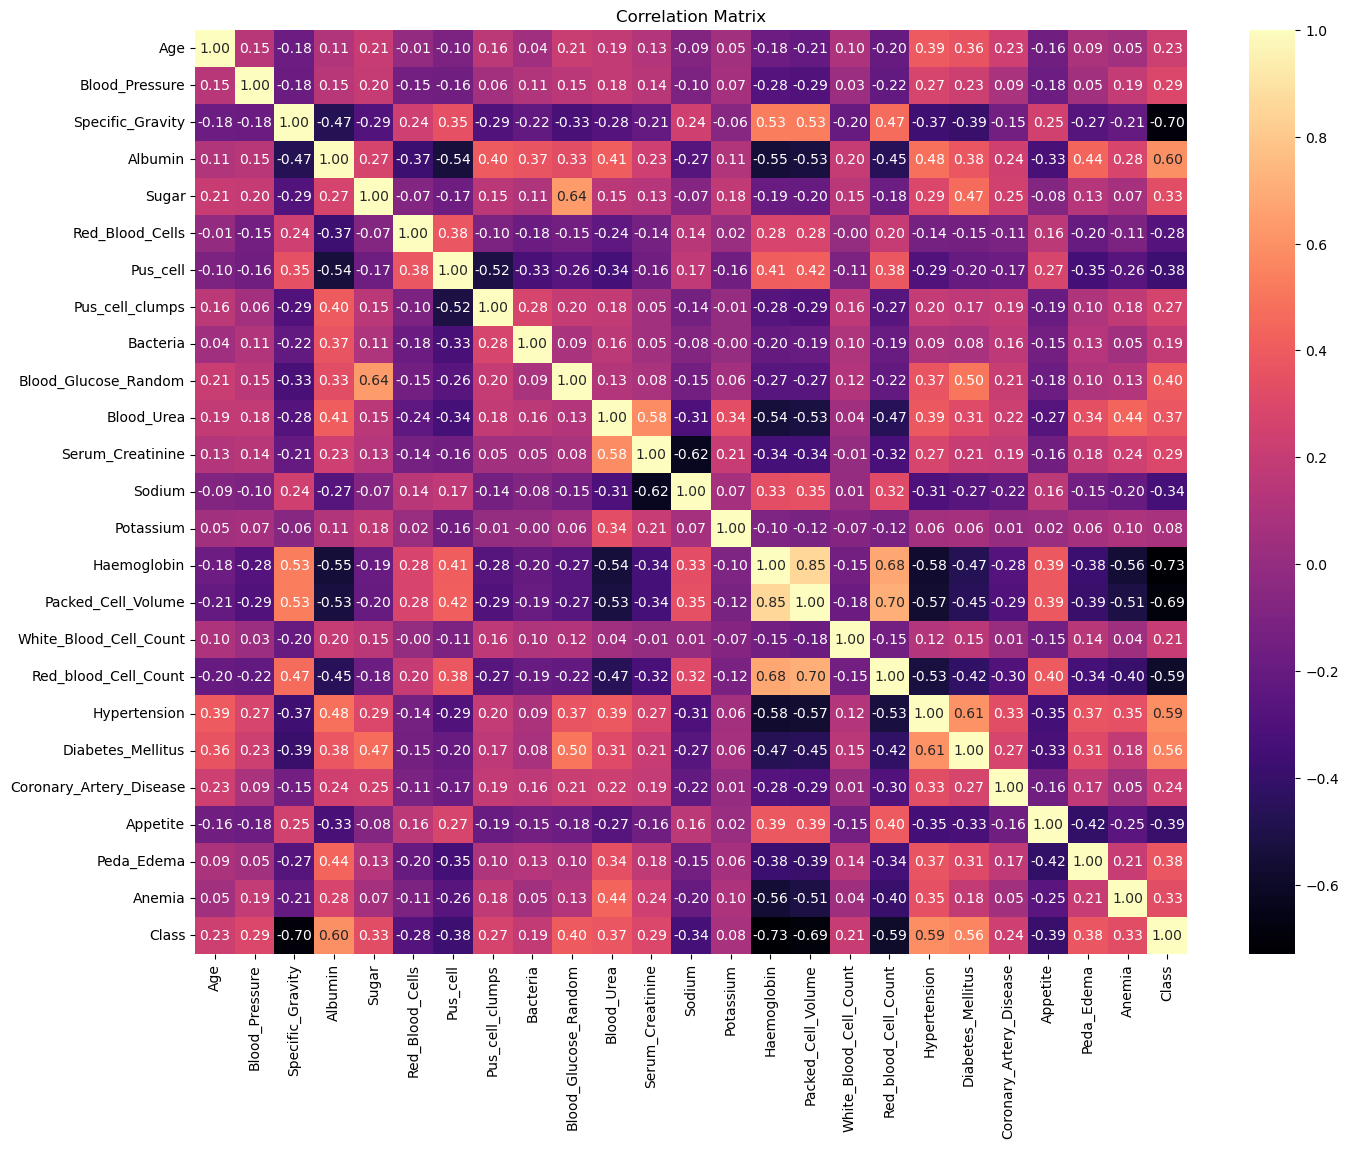

X-Train_shape : (300, 24)
X-Test_shape: (100, 24)


*******************Model Name :  Naive Bayes *********************

Confusion-Matrix : [[35  0]
 [ 2 63]]
Accuracy : 0.98
Precision : 1.0
Recall : 0.9692307692307692
F1score : 0.984375


*******************Model Name :  KNN *********************

Confusion-Matrix : [[31  4]
 [23 42]]
Accuracy : 0.73
Precision : 0.9130434782608695
Recall : 0.6461538461538462
F1score : 0.7567567567567568


*******************Model Name :  RandomForestClassifier *********************

Confusion-Matrix : [[35  0]
 [ 0 65]]
Accuracy : 1.0
Precision : 1.0
Recall : 1.0
F1score : 1.0


*******************Model Name :  DecisionTreeClassifier *********************

Confusion-Matrix : [[35  0]
 [ 1 64]]
Accuracy : 0.99
Precision : 1.0
Recall : 0.9846153846153847
F1score : 0.9922480620155039


*******************Model Name :  SVM *********************

Confusion-Matrix : [[34  1]
 [ 1 64]]
Accuracy : 0.98
Precision : 0.9846153846153847
Recall : 0.9846153846153847

In [9]:
#Import ALl the libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score,confusion_matrix

#Import the Data set
df=pd.read_csv("kidney_disease.csv")

#Find The Missing Values And Drop The Excess Columns
missing=df.isna().sum()
df_miss=missing[missing>0].sort_values(ascending=False).head(20)
df_miss
df.drop("id",axis=1,inplace=True)

#Name The Columns To Be User Friendly
df.columns=['Age','Blood_Pressure','Specific_Gravity','Albumin','Sugar','Red_Blood_Cells','Pus_cell','Pus_cell_clumps','Bacteria','Blood_Glucose_Random',
            'Blood_Urea','Serum_Creatinine','Sodium','Potassium','Haemoglobin','Packed_Cell_Volume','White_Blood_Cell_Count','Red_blood_Cell_Count','Hypertension'
            ,'Diabetes_Mellitus','Coronary_Artery_Disease','Appetite','Peda_Edema','Anemia','Class']
df.head()

#Data Cleaning
text_columns=['Packed_Cell_Volume','White_Blood_Cell_Count','Red_blood_Cell_Count']
print("*****Data-Cleaning : Part-1*****")
for i in text_columns:
    print(f"{i} : {df[i].dtype}")
def convert_text_to_numeric(df,columns):
    df[columns]=pd.to_numeric(df[columns],errors="coerce")
print("\n")
print("*****Datat-Cleaning : Part-2*****")
for columns in text_columns:
    convert_text_to_numeric(df,columns)
    print(f"{columns} : {df[columns].dtype}")
print("\n")
def Mean_value(df,column):
    mean_value=df[column].mean()
    df.fillna({column:mean_value},inplace=True)
def Mode_value(df,column):
    mode_value=df[column].mode()[0]
    df.fillna({column:mode_value},inplace=True)
num_cols=[col for col in df.columns if df[col].dtype=="float64"]
obj_cols=[col for col in df.columns if df[col].dtype=="object"]
for col_name in num_cols:
    Mean_value(df,col_name)
for col_name in obj_cols:
    Mode_value(df,col_name)
print("*****Data-Set After Data-Cleaning*****")
df

#Data PreProcessing
print(f"Diabetes_Mellitus :- {df['Diabetes_Mellitus'].unique()}")
print(f"Coronary_Artery_Disease :-{df['Coronary_Artery_Disease'].unique()}")
print(f"Class :- {df['Class'].unique()}")
print("\n")
df['Diabetes_Mellitus']=df['Diabetes_Mellitus'].replace(to_replace={' yes':'yes','\tno':'no','\tyes':'yes'})
df['Coronary_Artery_Disease']=df['Coronary_Artery_Disease'].replace(to_replace={'\tno':'no'})
df['Class']=df['Class'].replace(to_replace={'ckd\t':'ckd'})
print("*****Data-set After Preprocessing*****")
df
print(f"Diabetes_Mellitus :- {df['Diabetes_Mellitus'].unique()}")
print(f"Coronary_Artery_Disease :-{df['Coronary_Artery_Disease'].unique()}")
print(f"Class :- {df['Class'].unique()}")
print(f"Hypertension :- {df['Hypertension'].unique()}")
print(f"Appetite :- {df["Appetite"].unique()}")
print(f"Peda_Edema :- {df['Peda_Edema'].unique()}")
print(f"Anemia :- {df['Anemia'].unique()}")
df['Class'] = df['Class'].map({'ckd': 1, 'notckd': 0})
df['Red_Blood_Cells'] = df['Red_Blood_Cells'].map({'normal': 1, 'abnormal': 0})
df['Pus_cell'] = df['Pus_cell'].map({'normal': 1, 'abnormal': 0})
df['Pus_cell_clumps'] = df['Pus_cell_clumps'].map({'present': 1, 'notpresent': 0})
df['Bacteria'] = df['Bacteria'].map({'present': 1, 'notpresent': 0})
df['Hypertension'] = df['Hypertension'].map({'yes': 1, 'no': 0})
df['Diabetes_Mellitus'] = df['Diabetes_Mellitus'].map({'yes': 1, 'no': 0})
df['Coronary_Artery_Disease'] = df['Coronary_Artery_Disease'].map({'yes': 1, 'no': 0})
df['Appetite'] = df['Appetite'].map({'good': 1, 'poor': 0})
df['Peda_Edema'] = df['Peda_Edema'].map({'yes': 1, 'no': 0})
df['Anemia'] = df['Anemia'].map({'yes': 1, 'no': 0})
print("\n")

#Find the correlation using heatmap
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()

#Find The Correlation
target_corr=df.corr()['Class'].abs().sort_values(ascending=False)[1:]
target_corr

#Split the Data into Training and Testing Data
x=df.drop("Class",axis=1)
y=df["Class"]
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.25,random_state=42)
print("X-Train_shape :",x_train.shape)
print("X-Test_shape:",x_test.shape)

#Models Prediction
models=[]
models.append(('Naive Bayes',GaussianNB()))
models.append(('KNN',KNeighborsClassifier()))
models.append(('RandomForestClassifier',RandomForestClassifier()))
models.append(('DecisionTreeClassifier',DecisionTreeClassifier()))
models.append(('SVM',SVC(kernel='linear')))

#Find Its Accuracy,Confusion-Matrix,Precision,Recall,F1-Score
for name,model in models:
    print("\n")
    print("*******************Model Name : ",name,"*********************")
    print()
    model.fit(x_train,y_train)
    y_pred=model.predict(x_test)
    print("Confusion-Matrix :",confusion_matrix(y_test,y_pred))
    print("Accuracy :",accuracy_score(y_test,y_pred))
    print("Precision :",precision_score(y_test,y_pred))
    print("Recall :",recall_score(y_test,y_pred))
    print("F1score :",f1_score(y_test,y_pred))

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 26 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   id              400 non-null    int64  
 1   age             391 non-null    float64
 2   bp              388 non-null    float64
 3   sg              353 non-null    float64
 4   al              354 non-null    float64
 5   su              351 non-null    float64
 6   rbc             248 non-null    object 
 7   pc              335 non-null    object 
 8   pcc             396 non-null    object 
 9   ba              396 non-null    object 
 10  bgr             356 non-null    float64
 11  bu              381 non-null    float64
 12  sc              383 non-null    float64
 13  sod             313 non-null    float64
 14  pot             312 non-null    float64
 15  hemo            348 non-null    float64
 16  pcv             330 non-null    object 
 17  wc              295 non-null    obj

In [7]:
df.shape

(400, 26)

In [9]:
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [15]:
df.describe()

,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [11]:
df["Class"].value_counts()

Class
1    250
0    150
Name: count, dtype: int64

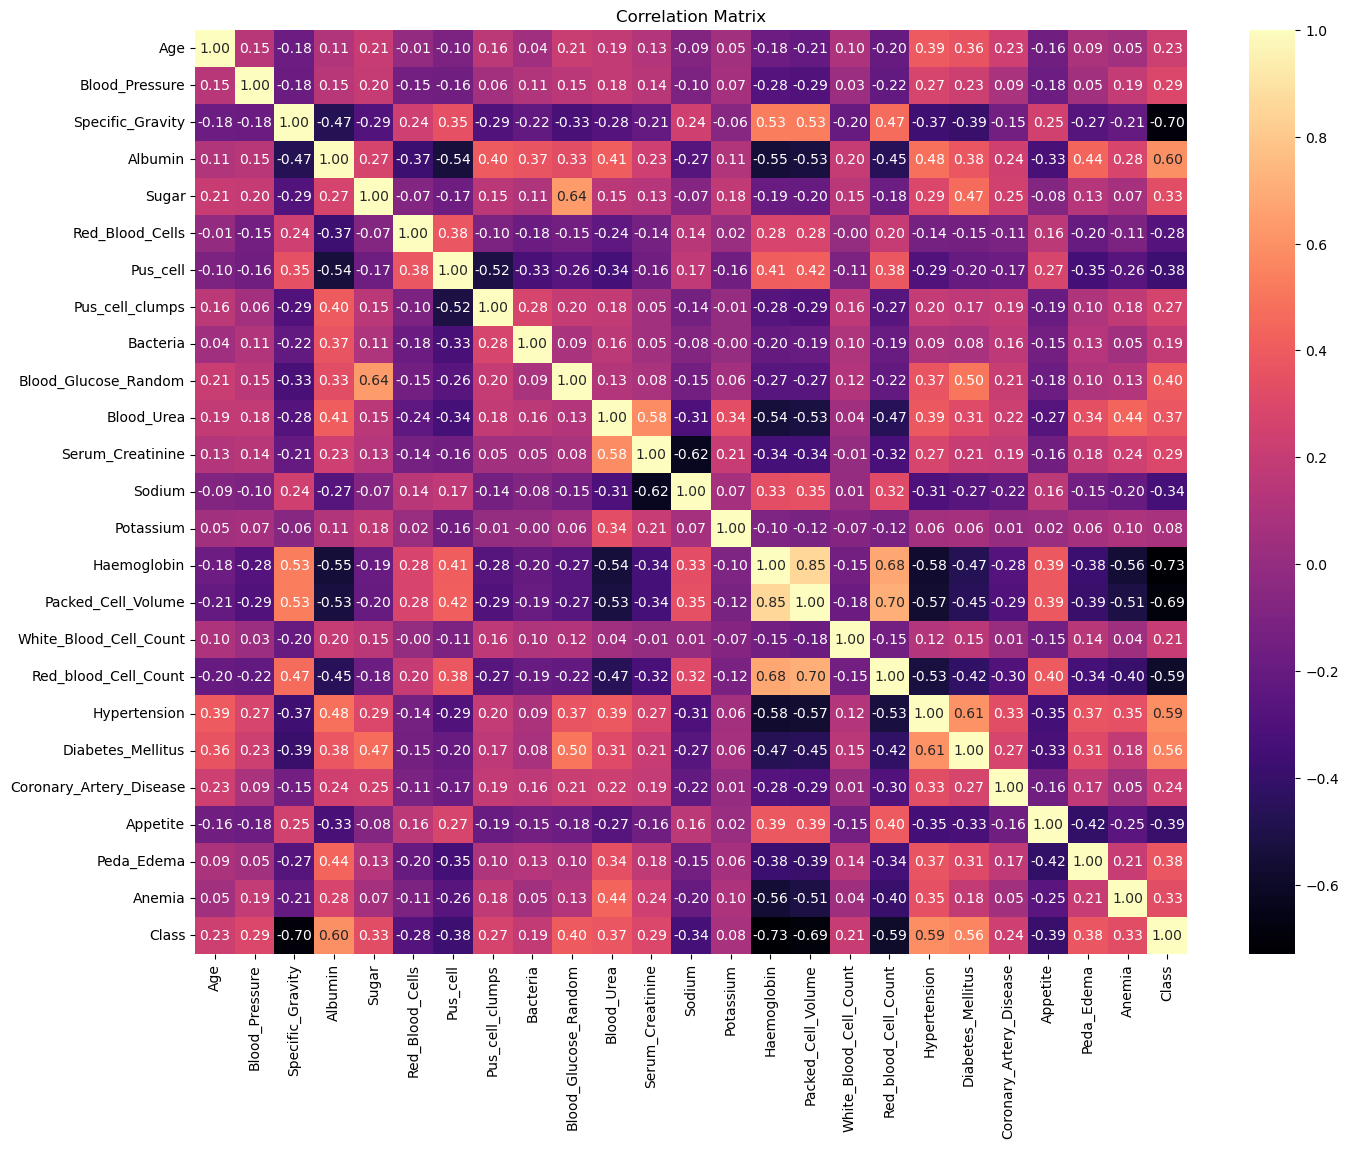

In [13]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(),annot=True,cmap="magma",fmt=".2f")
plt.title("Correlation Matrix")
plt.show()